In [65]:
#Importing Libaries 
import yfinance as yf
import pandas as pd

In [66]:
#Downloading price history for 1 ticker symbol
sp500 = yf.Ticker('^GSPC')

In [67]:
#Query the historical prices
sp500 = sp500.history(period='max')

In [68]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,3960.600098,4003.949951,3947.669922,3999.090088,3939700000,0.0,0.0
2023-01-17 00:00:00-05:00,3999.280029,4015.389893,3984.570068,3990.969971,4235560000,0.0,0.0
2023-01-18 00:00:00-05:00,4002.250000,4014.159912,3926.590088,3928.860107,4298710000,0.0,0.0


<AxesSubplot:xlabel='Date'>

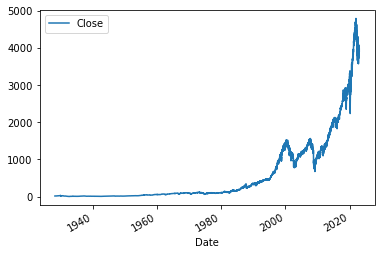

In [69]:
#ploting the closing price 
sp500.plot.line(y='Close', use_index = True)

In [70]:
#Cleaning the useless columns 
del sp500["Stock Splits"]
del sp500["Dividends"]

In [71]:
#Setting up Target: "On the days the stock go up, can we predict that the stock will go up?"
sp500['tomorrow'] = sp500['Close'].shift(-1)

In [72]:
sp500

,Open,High,Low,Close,Volume,Dividends,tomorrow
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.500000
...,...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,3960.600098,4003.949951,3947.669922,3999.090088,3939700000,0.0,3990.969971
2023-01-17 00:00:00-05:00,3999.280029,4015.389893,3984.570068,3990.969971,4235560000,0.0,3928.860107
2023-01-18 00:00:00-05:00,4002.250000,4014.159912,3926.590088,3928.860107,4298710000,0.0,3898.850098


In [73]:
#Creating a target, then make the bool into int for ML
sp500["Target"] = (sp500['tomorrow'] > sp500['Close']).astype(int)

In [74]:
sp500

,Open,High,Low,Close,Volume,Dividends,tomorrow,Target
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,3960.600098,4003.949951,3947.669922,3999.090088,3939700000,0.0,3990.969971,0
2023-01-17 00:00:00-05:00,3999.280029,4015.389893,3984.570068,3990.969971,4235560000,0.0,3928.860107,0
2023-01-18 00:00:00-05:00,4002.250000,4014.159912,3926.590088,3928.860107,4298710000,0.0,3898.850098,0


In [75]:
#Only use the more relevant historical data
sp500 = sp500.loc["1990-01-01":].copy()

In [76]:
sp500

,Open,High,Low,Close,Volume,Dividends,tomorrow,Target
Date,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,349.619995,0
...,...,...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,3960.600098,4003.949951,3947.669922,3999.090088,3939700000,0.0,3990.969971,0
2023-01-17 00:00:00-05:00,3999.280029,4015.389893,3984.570068,3990.969971,4235560000,0.0,3928.860107,0
2023-01-18 00:00:00-05:00,4002.250000,4014.159912,3926.590088,3928.860107,4298710000,0.0,3898.850098,0


In [77]:
#Train our ML model. 
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test= sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [78]:
# Measure the Accuracy of model: What percent of the time did we say market will go up, did the it actually go up
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [79]:
preds = pd.Series(preds,index=test.index)

In [80]:
preds

Date
2022-08-29 00:00:00-04:00    0
2022-08-30 00:00:00-04:00    0
2022-08-31 00:00:00-04:00    1
2022-09-01 00:00:00-04:00    0
2022-09-02 00:00:00-04:00    1
                            ..
2023-01-13 00:00:00-05:00    1
2023-01-17 00:00:00-05:00    1
2023-01-18 00:00:00-05:00    0
2023-01-19 00:00:00-05:00    0
2023-01-20 00:00:00-05:00    0
Length: 100, dtype: int32

In [81]:
precision_score(test["Target"],preds)

0.375

In [82]:
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

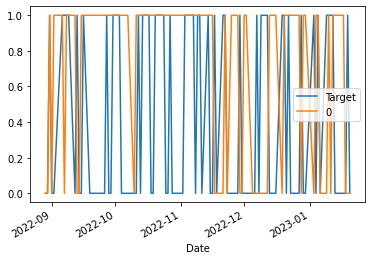

In [83]:
combined.plot()

In [85]:
# We need a more robust way to test our code, certianly we can only test the last 100 days. Need to backtest